<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/Informe_6_Select_mejora_informes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del problema


**Problema de selección**: Este problema consiste de encontrar un elemento *X* de un arreglo de números *A* no necesarimente ordenados.

Este elemento cumple la condición de ser mayor a una cantidad $i$ de elementos dentro del arreglo. 
- Entrada: conjunto $A$ con $n$ numeros diferentes más un indice i (ste valor también se conoce como **estadístico de orden $i$**).

**Estadísticos de orden** se refiere a un elemento mayor a una cierta cantidad de números dentro de una muestra, este cumplen un rol muy importante para la estadística no paramétrica y de inferencia.

- Salida: Elemento x el cual cumple con la condición de ser mayor a una cantidad $i-1$ de elementos dentro A.




# 2. Select

##**2.1 Algoritmo Select.**

En el siguiente codigo se muestra la implementación del algoritmo *Select*. 

Este retorna el **Estadísticos de orden de i** de un conjunto de n elementos




* codigo de insertion_sort

In [ ]:
contador = 0
def insertion_sort(array):

  
  global Contador
  for i in range (1,len(array)): #Ciclo más grande, es el que realiza cada paso del algoritmo
    key = array[i] #Se guarda número a ubicar
    j = i-1
    while 1:
      Contador += 1
      if j >= 0 and key < array[j]:
        #Si el número es mayor al de su izquierda, se intercambian de posición entre ellos
        array[j+1] = array[j]
        array[j] = key
        j-=1 #Se modifica variable j para seguir recorriendo el arreglo hacia la izquierda hasta llegar a la posición 0
      else:
        break #De no ser necesario una permutación, se sigue avanzando para el siguiente número

* pivot_selection

In [ ]:
def mediana(arreglo, l, n):  #Algortimo para encontrar medianas usando Insertion Sort
	aux = []

	for i in range (l, l+n):
		aux.append(arreglo[i])
	
	insertion_sort(aux)

	return aux[n // 2]

def pivotSelection(arreglo, l, r):

	# Cantidad de elementos dentro del arreglo
	n = r - l + 1
 
	medianas = []  #arreglo auxiliar para guardar medianas
 
	i = 0
	while (i < n // 5):  #Se divide el arreglo en grupos de 5 y se guardan las medianas en arreglo auxiliar
		medianas.append(mediana(arreglo, l + i * 5, 5))
		i += 1
 
	if (i * 5 < n):
		medianas.append(mediana(arreglo, l + i * 5, n % 5))
		i += 1
 
	if len(medianas) == 1:   #Si el arreglo auxiliar solo tiene un elemento, se ha encontrado la mediana y se retorna
		medias = medianas[0]
	else:
		medias = pivotSelection(medianas, 0, i - 1) #En caso de no encontrar aún la mediana, se aplica recursividad en arreglo auxiliar

	return medias #Se retorna la mediana de las medianas

* Partition

In [ ]:
def partition(l, r, arreglo, pivot):
	for i in range(l, r):
		if arreglo[i] == pivot:
			arreglo[i], arreglo[r] = arreglo[r], arreglo[i]
			break
 
	particion = l
	for i in range(l, r):
		if arreglo[i] <= pivot:
				arreglo[i], arreglo[particion] = arreglo[particion], arreglo[i]
				particion += 1
	arreglo[particion], arreglo[r] = arreglo[r], arreglo[particion]
	return particion

* Select

In [ ]:
def select(A, l, r, i, verbose):
	if(i > 0 and l != r and i-1 <= r): #Se comprueba si el índice a buscar se encuentra dentro del arreglo y es válido
		pivot = pivotSelection(A, l, r)
	
		if verbose == True:
			print("Pivote seleccionado para la partición: " + "\033[92m" + str(pivot))
			print("\033[0m")

		pi = partition(l, r, A, pivot)
	
		if verbose == True:
			print("PARTICIÓN REALIZADA\n " + "\033[34m" + "COLOR AZUL: VALORES MENORES " + "\033[33m" + "COLOR AMARILLO: VALORES MAYORES")
			print("\033[0m")
			print("[", end = '')
	 
			if(r != l):
				print("\033[34m", end = '')
			else:
				print("\033[0m", end = '')
			
			for j in range(l, pi):
				print(str(A[j]) + ", ", end = '')
		
			print("\033[0m", end = '')
	 
			if pi == r:
				print(str(A[pi]), end = '')
			else:
				print(str(A[pi]) + ", ", end = '')
				print("\033[33m", end = '')

			for j in range(pi+1, r+1):
				if j == r:
					print(str(A[j]), end = '')
				else:
					print(str(A[j]) + ", ", end = '')
		 
			print("\033[0m", end = '')
			print("]\n")

		if(i-1 < pi):
			if verbose == True:
				print(str(i) + " es menor a la posición del pivote " + "(" + str(pi+1) + ")" + " se sigue con la mitad izquierda\n")
			return select(A, l, pi - 1, i, verbose)
		if(i-1 == pi):
			if verbose == True:
				print(str(i) + " es igual a la posición del pivote " + "(" + str(pi+1) + ")" + " se retorna el elemento en la posición " + str(pi+1))
			return A[pi]
		if verbose == True:
				print(str(i) + " es mayor a la posición del pivote " + "(" + str(pi+1) + ")" + " se sigue con la mitad derecha\n") 
		return select(A, pi + 1, r, i, verbose)
	if (l == r):
		return A[0]
	return
#Ejemplo
A = [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1]
i = 1
k = 0
verbose = False

print("Entrada: ", A, "índice a buscar: ", i)
 
Contador = 0 #Contador de llamadas recursivas
Contador = 0 #Contador de comparaciones

k = select(A, 0, len(A)-1, i, verbose)

if verbose == True:
	print("\nSalida: " + "\033[92m" + str(k) + "\033[0m" + " contador de comparaciones: " + "\033[92m" + str(Contador) + "\033[0m")
else:
	print("Salida: ", k, "contador de comparaciones: ", Contador)


Entrada:  [12, 3, 2, 9, 17, 0, 21, 7, 5, 4, 8, 11, 6, 15, 1] índice a buscar:  1
Salida:  0 contador de comparaciones:  54


**2.2 Descripcion del algoritmo.**
Este algoritmo de Select consitste en encotrar la posición i-esima del Estadistico de orden, el cuale esta buscando meidante la realizacion de particiones(recursivas) al arreglo de entrada, alrededor de un pivote determinado por *pivoteSelection*.

El procerso de particion se busca los elementos del arreglo ordenados alrededor de un numero *Pivote*, de modo que los elementos son ubicados a la izquierda del pivote si son menor a este y a la derecha si son mayor, el cual busca generear particiones lo mas balanceadas posibles, mediante la busqueda de pivote que se acerque lo mas posible a la mediana real del conjunto.

Entonces se realiza los siguientes pasos:

1. Se divide el arreglo A de n elementos en una cantidad de sub-arreglos que contenga 5 elementos cada uno ( existe la posibilidad que exista sub-arreglos con menos cantidad de elementos (5)).

2. Se ordena cada sub-arreglo utilizando el metodo *Insetion-sort* y se busca la mediana de cada uno de los sub-arreglos, estas mediasnas se guardan en un arreglo auxiliar.

3. se aplica el mismo algortimo *Pivot Selection* de forma recursiva sobre cada arreglos de la medianas hasta que su tamaño sea de 1 solo elementos.

Ahora se aplica el algoritmo *Select* este compara el indice $i$ el cual es el buscado con la posición donde se encuentra el *Pivote*, de este modo existen 3 opciones:

1. Caso en el cual $i == pivote$ se retorna el elemento que se encuntra en dicha posición.

2. Caso en el cual $i > pivote$, se aplica recursivamente el algoritmo *Select* a la midad derecha del arreglo, que se contiene a los valores mayores al pivote.

3. Caso en el cual $i < pivote$, se aplica recursivamente el algoritmo *Select* a la midad izquierda del arreglo, que se contiene a los valores menores al pivote.




2.3 **Ejemplo**



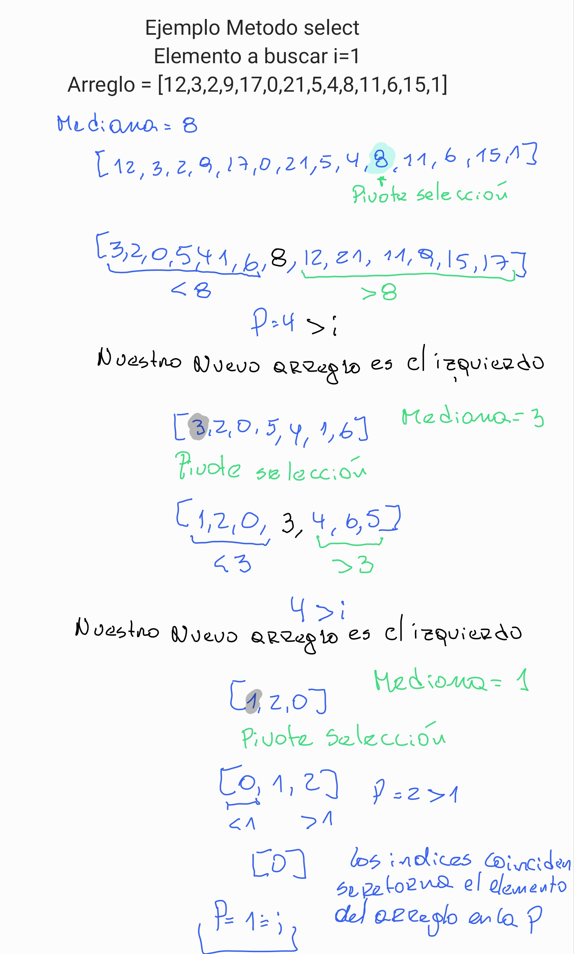

 se observa paso a paso el funcionamiento del algoritmo, distribuido en 3 pasos principales que consisten en las tres llamadas a partition que se realizan para este ejemplo, junto con los pivotes que son seleccionados por Pivot Selection después de cada partición.

2.4 Verbose == True.

In [ ]:
import random

A = random.sample(range(1, 100), 15)
i = random.randint(1,15)
verbose = True

if(verbose == True):
	print("Entrada: " + "\033[92m" + str(A) + "\033[0m" + " Índice a buscar: " + "\033[92m" + str(i))
	print("\033[0m")
else:
	print("Entrada: ", A)

Contador1 = 0

k = select(A, 0, len(A)-1, i, verbose)

if(verbose == True):
	print("\nSalida: " + "\033[92m" + str(k) + "\033[0m" + " Cantidad de comparaciones: " + str(Contador1))
	print("\033[0m")

Entrada: [8, 38, 17, 97, 65, 84, 22, 83, 59, 41, 56, 5, 60, 45, 53] Índice a buscar: 15

Pivote seleccionado para la partición: 53

PARTICIÓN REALIZADA
 COLOR AZUL: VALORES MENORES COLOR AMARILLO: VALORES MAYORES

[8, 38, 17, 22, 41, 5, 45, 53, 59, 65, 56, 84, 60, 97, 83]

15 es mayor a la posición del pivote (8) se sigue con la mitad derecha

Pivote seleccionado para la partición: 97

PARTICIÓN REALIZADA
 COLOR AZUL: VALORES MENORES COLOR AMARILLO: VALORES MAYORES

[59, 65, 56, 84, 60, 83, 97]

15 es igual a la posición del pivote (15) se retorna el elemento en la posición 15

Salida: 97 Cantidad de comparaciones: 0



# 3. Correctitud.
 ## Teorema 1.

- El algoritmo Select retorna el i-ésimo menor elemento de un arreglo de tamaño $n$, $1 \leq i \leq n $.

### Prueba del Teorema.

**Caso base n = 1.**

- Segun la condicion del teorema, se cumple que si o si que $i=1$, entonces estaremos buscano el menor elemento, en este caso el algoritmo retorna ese unico elemento.


**Paso inductivo.**

Para $n>1$, tenemos que la función *partition* divide el arreglo en 2 mitades a partir del un pivote(pivote-Selection), dejando los elementos menores a la izquierda y los mayores a la derecha, entonces se $p$ la posición final del pivote luego de ser ordenado el arreglo se puede decir que el pivote corresponde al *Estadistico de ordenen p-ésimo* de dicho arreglo exisitiendo 3 posibles casos:

1. $i < p$ el estadístico de orden se encuentra en la partición izquierda, y se repite el algoritmo para esta partición.

2. $i>p$  el estadístico de orden se encuentra en la partición derecha, y se repite el algoritmo para esta partición.

3. $i=p$ el estadístico de orden corresponde al pivote, por lo tanto, se retorna este elemento.

 los primeros dos casos, se repite el algoritmo para un sub-arreglo de tamaño m (el cual es menor al arreglo original) luego por paso inductivo, sabemis que la hipotesis $P(m)$ serarcierta para cualquier $m < n$.


Por lo tanto como se cumple el caso base y el paso inductivo queda desmostrada la correctitud del algortimo *Select*.









# 4. Tiempo de ejecución

Se analizara el comportamiento del algoritmo paso a paso.

paso 1. el cual consiste en dividir el arreglo este su complejidad corresponde a $O(n)$, esto es debido a que se recorre el arreglo completo para este paso.

paso 2. el cual consiste en encontrar las medianas, tenemos que *Insertion-Sort* se aplica para arreglo de tamaño constante es deciir que su tiempo de ejecucion es $O(1) => O(n) $.

paso 3. Se tarda un tiempo $t(n/5)$ esto ews debido a que se aplica el agoritmo *Select* de forma recursiva sobre los arreglos de la medianas del cual el tamño se sabe que es $n/5$.

Paso 4. En este se aplica la funcion *Partition*, la cual toma un tiempo de ejecucion $O(n)$, debido a que consta solo de reocrrer el arreglo original y distribuir cada elemento alrededor del pivote.

paso 5. en este paso tenemos encontrar el indice $i$ indicado se tiene que el tiempo de ejecucion es de $O(n)$.

Pero si se aplica recursivamente el algoritmo a algunas de las mitades ya sea la menor o mayores, lo cual representa aplicar el algoritmo a una cantidad de $7n/10$ $+16$de elementos.

En este caso la funcion de recurrencia quedaria:

- $T(n) = T({n/5}) + T(7n/10) + O(n)$

Se realiza la resolución de la función de recurrencia mediante substitución, en el cual se probará la relación $T(n) \leq cn $


Imagen

Obtenemos que para cualquier valor $d \geq 10c$ se cumple que $T(n) \leq dn$ donde se afirma que el algoritmo *Select* tiene un tiempo de ejecucion de $O(n), en el peor caso$.

Ahora sabemos que el algorimo poseen una complejidad $Ω(n)$m en su limites asintoticos superior o inferior de la función $T(n)$ son iguales, entonces la funcion se puede expresaer como $\circleddash (n)$





# 4. Experimentos

## 4.1 Relación mejor-peor caso

El mejor caso para este algoritmo es demorarse un tiempo lineal $O(n)$, a comparación del peor caso en el cual el tiempo sería cuadrático del orden $O(n^2)$. Esto dependerá de la relación entre qué tan separados estén el pivote y el índice  a buscar.

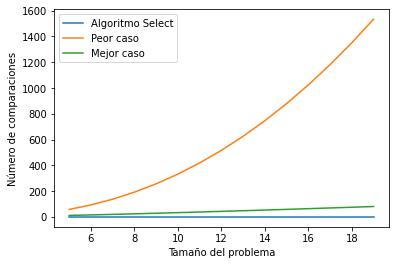

In [ ]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,20)] 
y1=[(n*n * math.log2(n)) for n in range(5,20)] # worst case
y2=[(n * math.log2(n)) for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  i = random.randint(1,20)
  Contador1 = 0

  k = select(a, 0, len(a)-1, i, verbose = False)
  y.append(Contador1)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Algoritmo Select", "Peor caso", "Mejor caso"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de comparaciones')
plt.show()

*Análisis de resultados*

Se puede observar que el comportamiento del Select en su peor caso tiene un creciemiento exponecial, lo cual indica lo insetable que puede ser en estos casos, sin embargo se observa que *el algoritmo select* es bastante constante siendo *O(n)* su tiempo de ejecucion durante esta prueba.
 

## 4.2 Comparación con Randomized-Select

La variante de este algoritmo es el randomized-select, el cual difiere en la selección del pivote para generar la partición, en vez de seleccionar un pivote mediante el algoritmo Pivot Selection, este se define de una manera aleatoria.

A continuación se grafica la diferencia de rendimiento entre las variantes.

In [ ]:
def partition2(arr, l, r):
      
    x = arr[r]
    i = l
    for j in range(l, r):
          
        if arr[j] <= x:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
              
    arr[i], arr[r] = arr[r], arr[i]
    return i
  
# finds the kth position (of the sorted array) 
# in a given unsorted array i.e this function 
# can be used to find both kth largest and 
# kth smallest element in the array. 
# ASSUMPTION: all elements in arr[] are distinct
def kthSmallest(arr, l, r, k):
  
    # if k is smaller than number of
    # elements in array
    if (k > 0 and k <= r - l + 1):
  
        # Partition the array around last
        # element and get position of pivot
        # element in sorted array
        index = partition2(arr, l, r)
  
        # if position is same as k
        if (index - l == k - 1):
            return arr[index]
  
        # If position is more, recur 
        # for left subarray 
        if (index - l > k - 1):
            return kthSmallest(arr, l, index - 1, k)
  
        # Else recur for right subarray 
        return kthSmallest(arr, index + 1, r, 
                            k - index + l - 1)
    print("Index out of bound")

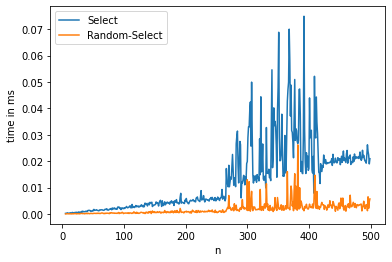

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x = []; y1 = [] ; y2 = []

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  i = random.randint(1,n)
  verbose = False

  #la función repeat está ejecutando 20 veces InsertionSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import select", stmt=f"select({a}, {0}, {len(a)-1}, {i}, {verbose})", repeat=1, number=10)

  k = repeat(setup="from __main__ import kthSmallest", stmt=f"kthSmallest({a}, {0}, {len(a)-1}, {i})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "Random-Select"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

*Análisis de resultados*

En la gráfica se puede apreciar los dos rendimientos según la variante a utilizar.

A diferencia de lo que se pudiese suponer, el algoritmo Select tiene un rendimiento promedio peor a la selección aleatoria de pivotes, esto puede deberse al tiempo extra que toma la función Pivot Selection, se observa un Peaks en el tiempo de ejecucion de para ambos algoritmo esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular.